In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('/kaggle/input/ai-in-healthcare-dataset-csv/AI_in_HealthCare_Dataset.csv')

In [62]:
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Blood_Pressure           5000 non-null   float64
 4   Heart_Rate               5000 non-null   float64
 5   Temperature              5000 non-null   float64
 6   Diagnosis                5000 non-null   object 
 7   Medication               5000 non-null   object 
 8   Treatment_Duration       5000 non-null   int64  
 9   Insurance_Type           5000 non-null   object 
 10  Doctor_Name              5000 non-null   object 
 11  Hospital_Name            5000 non-null   object 
 12  Lab_Test_Results         5000 non-null   float64
 13  X-ray_Results            5000 non-null   object 
 14  Surgery_Type            

In [64]:
df.describe()

,Patient_ID,Age,Blood_Pressure,Heart_Rate,Temperature,Treatment_Duration,Lab_Test_Results,Recovery_Time,Patient_Satisfaction,AI_Diagnosis_Confidence
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,53.433200,119.863621,74.755327,98.603710,14.965400,100.201480,4.944200,2.993600,0.843927
std,1443.520003,20.931669,15.055656,9.974505,1.002509,8.403495,19.813474,2.570994,1.417731,0.084355
min,1.000000,18.000000,61.940115,36.760595,94.930131,1.000000,24.567602,1.000000,1.000000,0.700017
25%,1250.750000,35.000000,109.896065,67.935319,97.929791,8.000000,86.769592,3.000000,2.000000,0.768968
50%,2500.500000,53.000000,119.772157,75.000152,98.618301,15.000000,100.473921,5.000000,3.000000,0.843321
75%,3750.250000,72.000000,129.893989,81.556148,99.265743,22.000000,113.730522,7.000000,4.000000,0.917418
max,5000.000000,89.000000,168.092063,117.198456,102.497318,29.000000,168.340588,9.000000,5.000000,0.989988


In [65]:
# df = df.drop(['Patient_ID', 'Insurance_Type', 'Doctor_Name', 'Hospital_Name'], axis=1)
df = df.drop(['Patient_ID'], axis=1)

In [66]:
df.head()

,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


In [67]:
df.isnull().sum()

Age                          0
Gender                       0
Blood_Pressure               0
Heart_Rate                   0
Temperature                  0
Diagnosis                    0
Medication                   0
Treatment_Duration           0
Insurance_Type               0
Doctor_Name                  0
Hospital_Name                0
Lab_Test_Results             0
X-ray_Results                0
Surgery_Type                 0
Recovery_Time                0
Allergies                  964
Family_History               0
Patient_Satisfaction         0
AI_Diagnosis_Confidence      0
dtype: int64

In [68]:
df.fillna(df['Allergies'].mode()[0], inplace=True)

In [69]:
df.isnull().sum()

Age                        0
Gender                     0
Blood_Pressure             0
Heart_Rate                 0
Temperature                0
Diagnosis                  0
Medication                 0
Treatment_Duration         0
Insurance_Type             0
Doctor_Name                0
Hospital_Name              0
Lab_Test_Results           0
X-ray_Results              0
Surgery_Type               0
Recovery_Time              0
Allergies                  0
Family_History             0
Patient_Satisfaction       0
AI_Diagnosis_Confidence    0
dtype: int64

In [70]:
df.head()

,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,Shellfish,Hypertension,2,0.802673
3,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
continuous_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df.head()

,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,0.619718,Female,0.380671,0.535402,0.526250,Hypertension,Statins,0.821429,Uninsured,Dr. Brown,Children's Hospital,0.628342,Abnormal,Appendectomy,0.500,Latex,Heart Disease,0.50,0.749685
1,0.661972,Male,0.714267,0.448257,0.526269,Hypertension,Insulin,1.000000,Uninsured,Dr. Wang,Healthcare Clinic,0.445072,Normal,Knee Replacement,0.125,Shellfish,Diabetes,0.75,0.385173
2,0.901408,Male,0.336107,0.253299,0.562904,Influenza,Chemotherapy,0.500000,Private,Dr. Johnson,Children's Hospital,0.571300,Normal,Gallbladder Removal,0.750,Shellfish,Hypertension,0.25,0.354021
3,0.943662,Male,0.563378,0.380359,0.145808,Heart Disease,Chemotherapy,0.142857,Private,Dr. Smith,Healthcare Clinic,0.406722,Normal,Cataract Surgery,0.750,Latex,Hypertension,1.00,0.402779
4,0.943662,Male,0.636732,0.349199,0.548096,Heart Disease,Insulin,0.321429,Private,Dr. Lee,Children's Hospital,0.424115,Abnormal,Appendectomy,1.000,Shellfish,Diabetes,0.00,0.175303


In [72]:
from sklearn.preprocessing import LabelEncoder
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Youth', 'Adult', 'Middle-aged', 'Senior'])

df['Age Group'] = LabelEncoder().fit_transform(df['Age Group'])
df = df.drop('Age', axis = 1)

df.head()

,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence,Age Group
0,Female,0.380671,0.535402,0.526250,Hypertension,Statins,0.821429,Uninsured,Dr. Brown,Children's Hospital,0.628342,Abnormal,Appendectomy,0.500,Latex,Heart Disease,0.50,0.749685,0
1,Male,0.714267,0.448257,0.526269,Hypertension,Insulin,1.000000,Uninsured,Dr. Wang,Healthcare Clinic,0.445072,Normal,Knee Replacement,0.125,Shellfish,Diabetes,0.75,0.385173,0
2,Male,0.336107,0.253299,0.562904,Influenza,Chemotherapy,0.500000,Private,Dr. Johnson,Children's Hospital,0.571300,Normal,Gallbladder Removal,0.750,Shellfish,Hypertension,0.25,0.354021,0
3,Male,0.563378,0.380359,0.145808,Heart Disease,Chemotherapy,0.142857,Private,Dr. Smith,Healthcare Clinic,0.406722,Normal,Cataract Surgery,0.750,Latex,Hypertension,1.00,0.402779,0
4,Male,0.636732,0.349199,0.548096,Heart Disease,Insulin,0.321429,Private,Dr. Lee,Children's Hospital,0.424115,Abnormal,Appendectomy,1.000,Shellfish,Diabetes,0.00,0.175303,0


In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
df['Patient_Satisfaction'] = le.fit_transform(df['Patient_Satisfaction'])
df.head()

,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence,Age Group
0,0,0.380671,0.535402,0.526250,3,4,0.821429,3,0,0,0.628342,0,1,0.500,0,3,2,0.749685,0
1,1,0.714267,0.448257,0.526269,3,3,1.000000,3,4,3,0.445072,1,4,0.125,3,2,3,0.385173,0
2,1,0.336107,0.253299,0.562904,4,2,0.500000,2,1,0,0.571300,1,3,0.750,3,4,1,0.354021,0
3,1,0.563378,0.380359,0.145808,2,2,0.142857,2,3,3,0.406722,1,2,0.750,0,4,4,0.402779,0
4,1,0.636732,0.349199,0.548096,2,3,0.321429,2,2,0,0.424115,0,1,1.000,3,2,0,0.175303,0


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()
correlation_matrix

,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence,Age Group
Gender,1.000000,0.007144,-0.007491,-0.008366,-0.007412,-0.023354,0.002727,0.016639,0.000986,-0.023947,0.010076,0.015151,-0.001527,-0.004116,-0.007576,-0.009565,0.010096,-0.006777,0.012778
Blood_Pressure,0.007144,1.000000,-0.020551,-0.001762,0.003579,-0.005478,0.020240,0.022648,0.004084,-0.013160,0.018904,-0.029938,-0.003052,-0.036235,-0.001305,-0.013504,-0.007098,0.019085,0.012242
Heart_Rate,-0.007491,-0.020551,1.000000,0.005259,0.011379,0.014380,0.006853,0.007358,-0.012305,0.008809,-0.000908,-0.002269,-0.009934,0.005720,-0.002184,0.005039,0.002184,0.006810,-0.013921
Temperature,-0.008366,-0.001762,0.005259,1.000000,0.003059,-0.021882,-0.010509,0.009702,-0.005575,0.006367,0.002036,-0.007579,-0.004585,0.005876,-0.011216,0.012424,0.024504,0.026684,-0.014669
Diagnosis,-0.007412,0.003579,0.011379,0.003059,1.000000,-0.005065,-0.020184,0.006156,0.005138,-0.001256,0.007289,0.001801,0.005830,-0.027595,0.032997,0.005581,-0.000156,-0.016164,-0.001728
Medication,-0.023354,-0.005478,0.014380,-0.021882,-0.005065,1.000000,-0.031756,0.012558,0.001395,-0.017970,0.008824,-0.015502,-0.001662,-0.002685,-0.002139,0.011569,0.011695,-0.000964,-0.000767
Treatment_Duration,0.002727,0.020240,0.006853,-0.010509,-0.020184,-0.031756,1.000000,0.005003,-0.021533,0.012349,0.033340,0.001961,-0.010673,0.017484,0.023356,-0.005832,0.008578,-0.015160,-0.015300
Insurance_Type,0.016639,0.022648,0.007358,0.009702,0.006156,0.012558,0.005003,1.000000,0.001347,-0.008161,0.002133,-0.025466,-0.009706,-0.017732,-0.014875,0.016698,0.002445,-0.018180,0.010849
Doctor_Name,0.000986,0.004084,-0.012305,-0.005575,0.005138,0.001395,-0.021533,0.001347,1.000000,0.013492,0.013221,0.001277,-0.019967,-0.000679,-0.013812,0.001115,0.018759,-0.011787,0.021243
Hospital_Name,-0.023947,-0.013160,0.008809,0.006367,-0.001256,-0.017970,0.012349,-0.008161,0.013492,1.000000,0.001348,0.004595,-0.005632,-0.000989,-0.021296,-0.000921,0.032679,-0.025821,0.006065


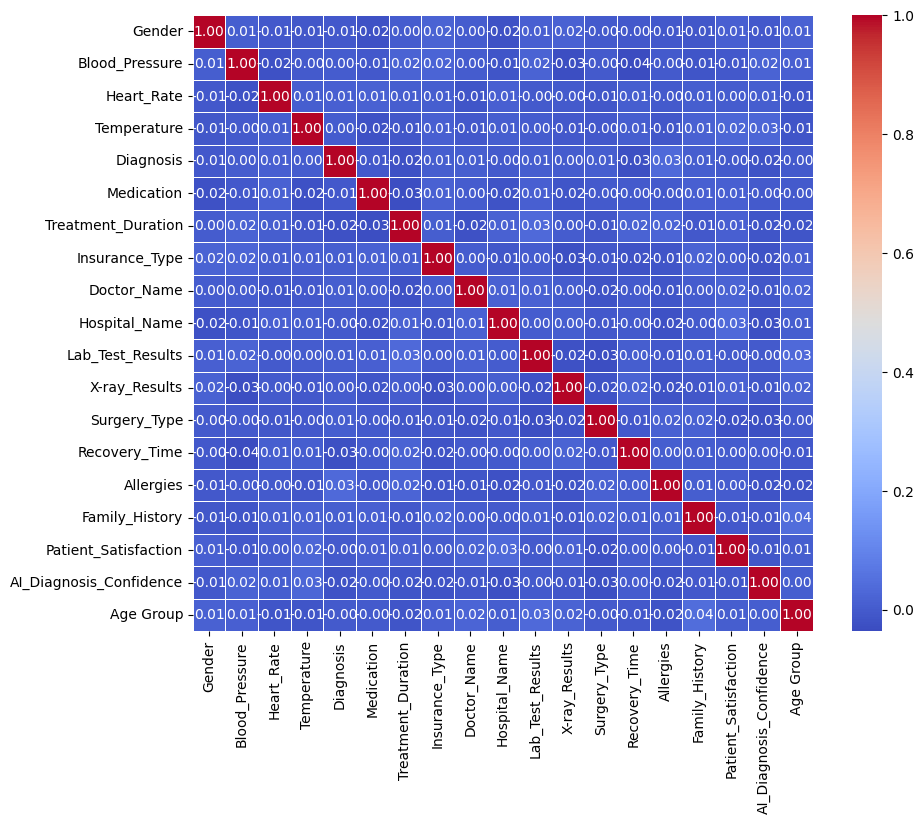

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [76]:
x = df.drop(['Patient_Satisfaction', 'AI_Diagnosis_Confidence'], axis=1)
y = df['Patient_Satisfaction']

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(4000, 17) (1000, 17) (4000,) (1000,)


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score


In [79]:
model_random_forest = RandomForestClassifier()

model_random_forest.fit(x_train, y_train)

predictions_random_forest = model_random_forest.predict(x_test)

model_random_forest_f1 = f1_score(y_test, predictions_random_forest, average='weighted')
print(model_random_forest_f1)

0.20477448122259903


In [21]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


100%|===================| 4984/5000 [04:45<00:00]        

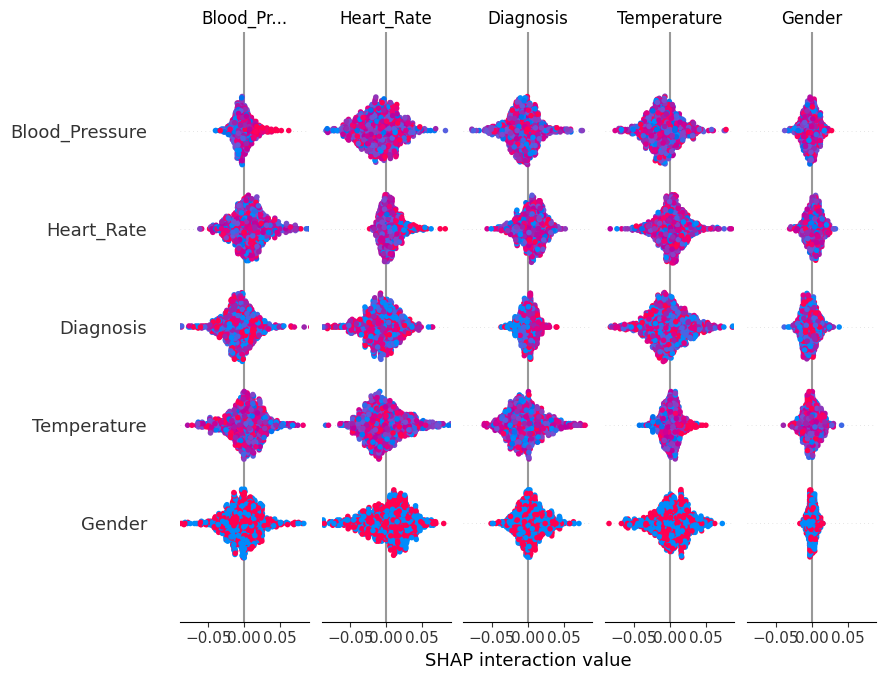

In [ ]:
import shap
# Compute SHAP values
# explainer = shap.Explainer(model1, x_train)
explainer_random_forest = shap.TreeExplainer(model_random_forest, x_train)
shap_values_random_forest = explainer_random_forest(x_test, check_additivity=False)

# Visualizations
# shap.summary_plot(shap_values_random_forest, x_test, plot_type="bar", feature_names=x.columns)  # Summary bar plot
shap.summary_plot(shap_values_random_forest, x_test, plot_type="dot", feature_names=x.columns)  # Summary bee-swarm plot

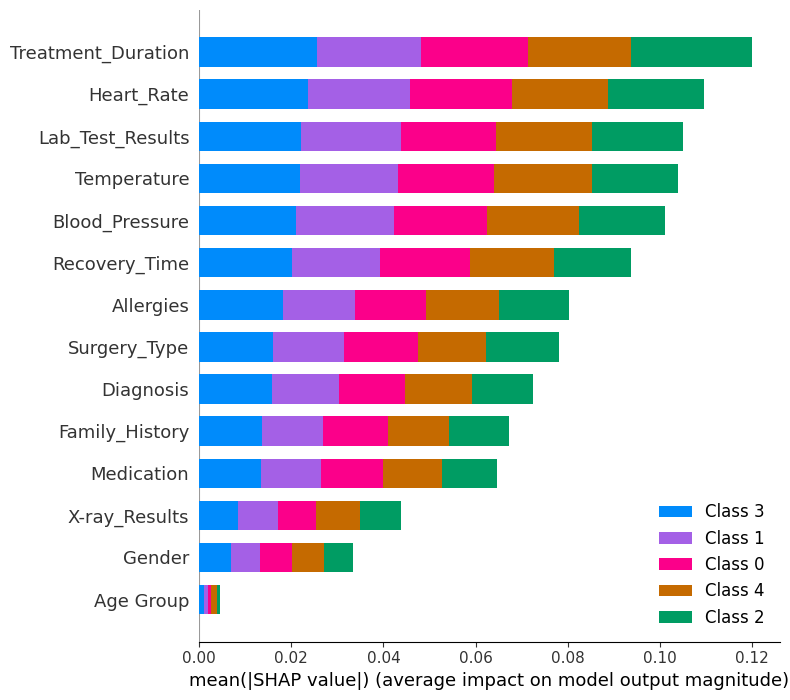

In [78]:
shap.summary_plot(shap_values_random_forest, X_train, plot_type="bar")


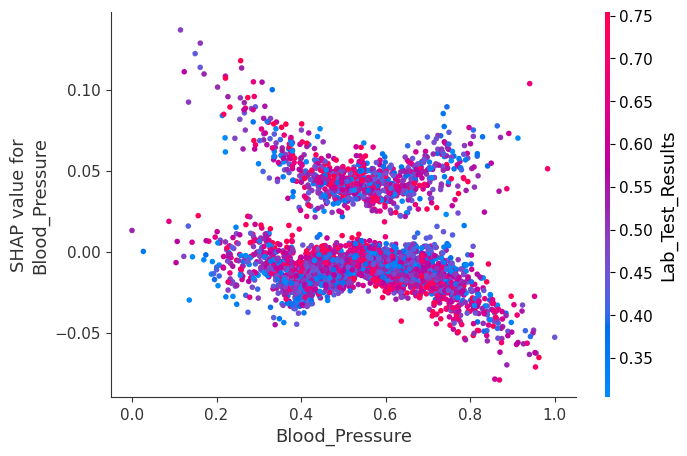

In [80]:
feature_name = 'Blood_Pressure'  # Replace 'example_feature_name' with your actual feature of interest

# Select a feature for coloring to show interactions; if not sure, let SHAP choose one
interaction_index = 'auto'  # Set to 'auto' or specify another feature name

shap.dependence_plot(ind=feature_name, shap_values=shap_values_random_forest[0], features=x_train, interaction_index=interaction_index)

# Regression

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Define the XGBoost regressor
# xg_reg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state = 42)

# Train the model
xg_reg_model.fit(x_train, y_train)

# Predict on the test set
predictions_xgb_res = xg_reg_model.predict(x_test)

# Evaluate the model
r = r2_score(y_test, predictions_xgb_res)
print("r2 score:", r)


r2 score: -0.2194562005931877


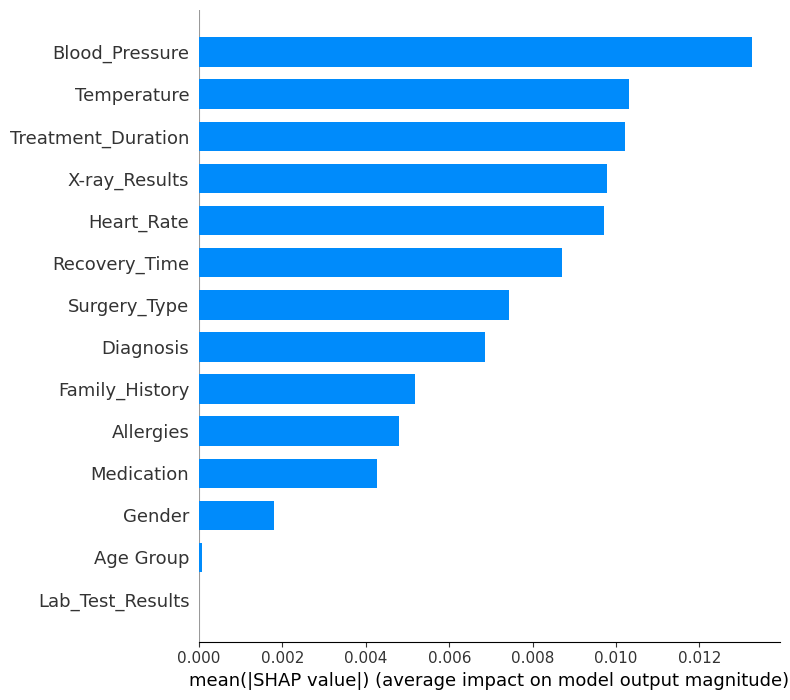

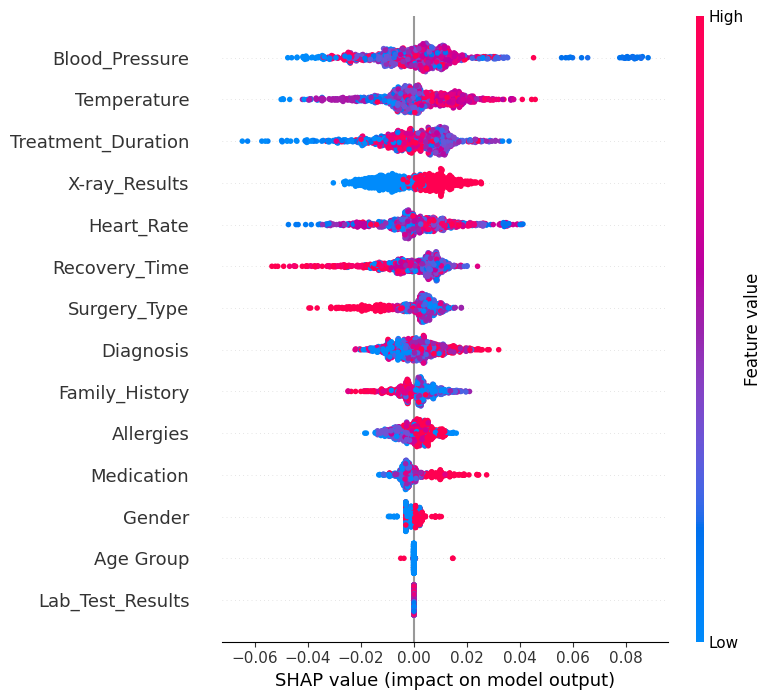

In [23]:
import shap
# Compute SHAP values
explainer_xgb = shap.Explainer(xg_reg, x_train)
shap_values_xgb = explainer_xgb(X_test)

# Visualizations
shap.summary_plot(shap_values_xgb, x_test, plot_type="bar", feature_names=x.columns)  # Summary bar plot
shap.summary_plot(shap_values_xgb, x_test, plot_type="dot", feature_names=x.columns)  # Summary bee-swarm plot

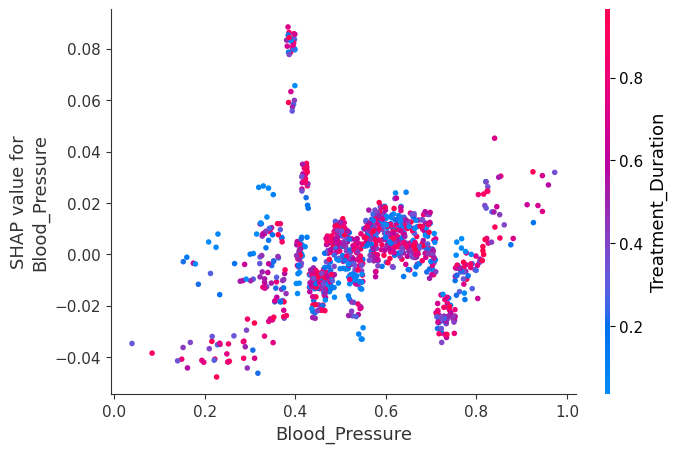

In [41]:
import numpy as np
# Calculate the mean of the absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values_xgb.values).mean(axis=0)
top_feature_index = np.argmax(mean_shap_values)
top_feature = x.columns[top_feature_index]

# Dependence plot for the most important feature
shap.dependence_plot(top_feature_index, shap_values.values, x_test, feature_names=x.columns)

# Assuming X_test is still a DataFrame. If it's not, make sure to convert or keep it as a DataFrame after scaling.
shap.initjs()
# Force plot for a single prediction
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb.values[0,:], x_test.iloc[0,:], feature_names=x.columns)

In [43]:
e3 = shap.TreeExplainer(xg_reg, x_train)
shap.initjs()
shap.force_plot(e3.expected_value, shap_values.values[0:500,:], x_test.iloc[0:500,:], feature_names=x.columns)

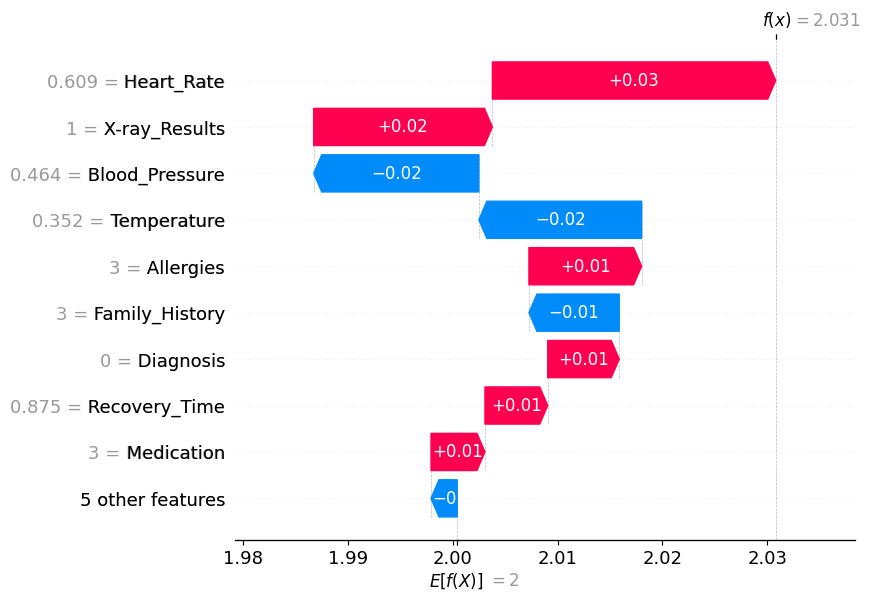

In [48]:
shap.waterfall_plot(shap_values_xgb[0])